# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.177580e+01     8.314738e+00
 * time: 0.004235982894897461
     1     3.095844e+01     5.283999e+00
 * time: 0.020166873931884766
     2     2.185054e+01     4.692591e+00
 * time: 0.04036283493041992
     3     1.921727e+01     5.058553e+00
 * time: 0.0598299503326416
     4     1.226407e+01     2.648317e+00
 * time: 0.07988786697387695
     5     1.204615e+01     4.173143e+00
 * time: 0.0959479808807373
     6     1.087209e+01     3.061795e+00
 * time: 0.1117408275604248
     7     1.021374e+01     2.190065e+00
 * time: 0.12770390510559082
     8     9.429460e+00     1.642050e+00
 * time: 0.14364290237426758
     9     8.750025e+00     8.139525e-01
 * time: 0.15958189964294434
    10     8.404257e+00     5.375311e-01
 * time: 0.1754930019378662
    11     8.261796e+00     5.724364e-01
 * time: 0.19181489944458008
    12     8.186963e+00     3.656344e-01
 * time: 0.20773887634277344
    13     8.143661e+00     4.623673e-01
 * time: 0

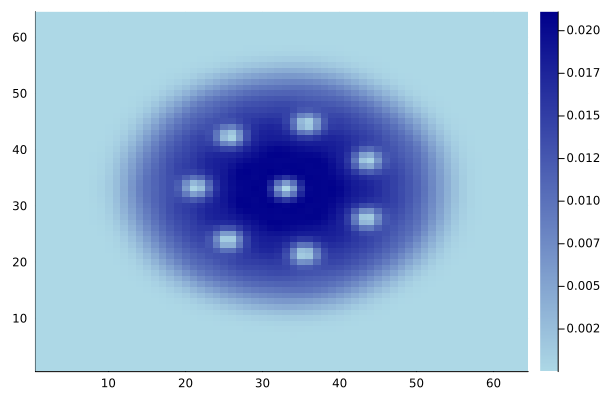

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)